# Laboratory of Computational Physics mod.B

## Competition

### Group name: LoCPdown
### Components:
* Campesan Giulia (2027592)
* Faorlin Tommaso (2021857)
* Marcomini Alessandro (2024286)

In [206]:
#import packages
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

np.random.seed(12345)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


### Loading and preparing data 

Here we focus on a known dataset in which a total of 10'000 samples are generated starting from a noisy sinusoidal signal. Some of them have been randomly modified by adding a positive or negative peak with a given intensity. As a result, data are classified in three classes (0: no peak, 1: positive peak, 2: negative peak). 

We import the datafile and proceed to renormalize the input to avoid gradient saturations.

In [207]:
str1 = 'ts_comp_N10000'
fnamex1 = 'DATA/x_'+str1+'.csv'
fnamey1 = 'DATA/y_'+str1+'.csv'

x = np.loadtxt(fnamex1, delimiter = ',', dtype = float)
categ = np.loadtxt(fnamey1, delimiter = ',', dtype = int)

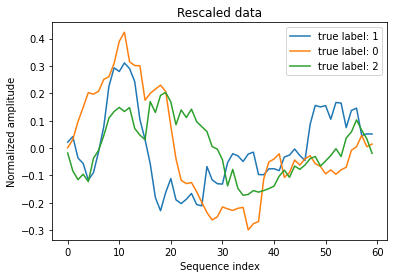


Total samples:  10000 
Training samples:  8000 
Test samples:  2000 
Sequence length:  60


In [208]:
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
x /= np.abs(x.max())
    
plt.plot(x[0], label=('true label: ' + str(categ[0])))
plt.plot(x[1], label=('true label: ' + str(categ[1])))
plt.plot(x[2], label=('true label: ' + str(categ[2])))
plt.xlabel('Sequence index')
plt.ylabel('Normalized amplitude')
plt.title('Rescaled data')
plt.legend()
plt.show()    

#one-hot encoding
N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             

perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

print('\nTotal samples: ', N,
      '\nTraining samples: ', N_train,
      '\nTest samples: ', N_val,
      '\nSequence length: ', len(x[0])
     )

x_train = x_train.reshape(x_train.shape[0],len(x[0]),1)  
x_val = x_val.reshape(x_val.shape[0],len(x[0]),1)
input_shape = (len(x[0]),1)

In [218]:
batch_size=150
epochs = 250
ini = initializers.RandomNormal(mean = 0, stddev = 0.05, seed = 12345)
reg = regularizers.l1(0.001)    

 tt

fit1 = model1.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 2
               )

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 50, 6)             72        
_________________________________________________________________
average_pooling1d_62 (Averag (None, 10, 6)             0         
_________________________________________________________________
batch_normalization_115 (Bat (None, 10, 6)             24        
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 4, 5)              215       
_________________________________________________________________
flatten_63 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 9)                 189       
_________________________________________________________________
dropout_72 (Dropout)         (None, 9)               

Epoch 68/250
54/54 - 0s - loss: 0.5164 - accuracy: 0.7816 - val_loss: 0.5134 - val_accuracy: 0.7940
Epoch 69/250
54/54 - 0s - loss: 0.5085 - accuracy: 0.7868 - val_loss: 0.4914 - val_accuracy: 0.8050
Epoch 70/250
54/54 - 0s - loss: 0.5014 - accuracy: 0.7929 - val_loss: 0.4635 - val_accuracy: 0.8245
Epoch 71/250
54/54 - 0s - loss: 0.5105 - accuracy: 0.7910 - val_loss: 0.4789 - val_accuracy: 0.8010
Epoch 72/250
54/54 - 0s - loss: 0.5045 - accuracy: 0.7872 - val_loss: 0.5303 - val_accuracy: 0.7875
Epoch 73/250
54/54 - 0s - loss: 0.5061 - accuracy: 0.7883 - val_loss: 0.4949 - val_accuracy: 0.8095
Epoch 74/250
54/54 - 0s - loss: 0.5040 - accuracy: 0.7891 - val_loss: 0.4644 - val_accuracy: 0.8205
Epoch 75/250
54/54 - 0s - loss: 0.5054 - accuracy: 0.7905 - val_loss: 0.4765 - val_accuracy: 0.8155
Epoch 76/250
54/54 - 1s - loss: 0.5057 - accuracy: 0.7883 - val_loss: 0.4785 - val_accuracy: 0.8150
Epoch 77/250
54/54 - 0s - loss: 0.5048 - accuracy: 0.7900 - val_loss: 0.4656 - val_accuracy: 0.8145


Epoch 150/250
54/54 - 1s - loss: 0.4740 - accuracy: 0.8055 - val_loss: 0.4733 - val_accuracy: 0.8125
Epoch 151/250
54/54 - 1s - loss: 0.4846 - accuracy: 0.7991 - val_loss: 0.4662 - val_accuracy: 0.8165
Epoch 152/250
54/54 - 1s - loss: 0.4758 - accuracy: 0.8027 - val_loss: 0.4393 - val_accuracy: 0.8330
Epoch 153/250
54/54 - 1s - loss: 0.4774 - accuracy: 0.8050 - val_loss: 0.4380 - val_accuracy: 0.8345
Epoch 154/250
54/54 - 0s - loss: 0.4751 - accuracy: 0.8092 - val_loss: 0.4552 - val_accuracy: 0.8325
Epoch 155/250
54/54 - 0s - loss: 0.4755 - accuracy: 0.8044 - val_loss: 0.4844 - val_accuracy: 0.8205
Epoch 156/250
54/54 - 0s - loss: 0.4800 - accuracy: 0.8034 - val_loss: 0.4819 - val_accuracy: 0.8050
Epoch 157/250
54/54 - 1s - loss: 0.4677 - accuracy: 0.8100 - val_loss: 0.4513 - val_accuracy: 0.8265
Epoch 158/250
54/54 - 0s - loss: 0.4799 - accuracy: 0.8020 - val_loss: 0.4813 - val_accuracy: 0.8000
Epoch 159/250
54/54 - 1s - loss: 0.4807 - accuracy: 0.7979 - val_loss: 0.4414 - val_accurac

54/54 - 0s - loss: 0.4737 - accuracy: 0.8129 - val_loss: 0.5017 - val_accuracy: 0.7965
Epoch 232/250
54/54 - 0s - loss: 0.4600 - accuracy: 0.8215 - val_loss: 0.4395 - val_accuracy: 0.8330
Epoch 233/250
54/54 - 0s - loss: 0.4592 - accuracy: 0.8169 - val_loss: 0.4374 - val_accuracy: 0.8375
Epoch 234/250
54/54 - 0s - loss: 0.4505 - accuracy: 0.8245 - val_loss: 0.4493 - val_accuracy: 0.8295
Epoch 235/250
54/54 - 0s - loss: 0.4579 - accuracy: 0.8205 - val_loss: 0.4475 - val_accuracy: 0.8375
Epoch 236/250
54/54 - 0s - loss: 0.4554 - accuracy: 0.8201 - val_loss: 0.4690 - val_accuracy: 0.8295
Epoch 237/250
54/54 - 0s - loss: 0.4582 - accuracy: 0.8191 - val_loss: 0.4431 - val_accuracy: 0.8325
Epoch 238/250
54/54 - 0s - loss: 0.4539 - accuracy: 0.8204 - val_loss: 0.4484 - val_accuracy: 0.8345
Epoch 239/250
54/54 - 0s - loss: 0.4550 - accuracy: 0.8195 - val_loss: 0.4457 - val_accuracy: 0.8330
Epoch 240/250
54/54 - 0s - loss: 0.4608 - accuracy: 0.8195 - val_loss: 0.4690 - val_accuracy: 0.8280
Epoc

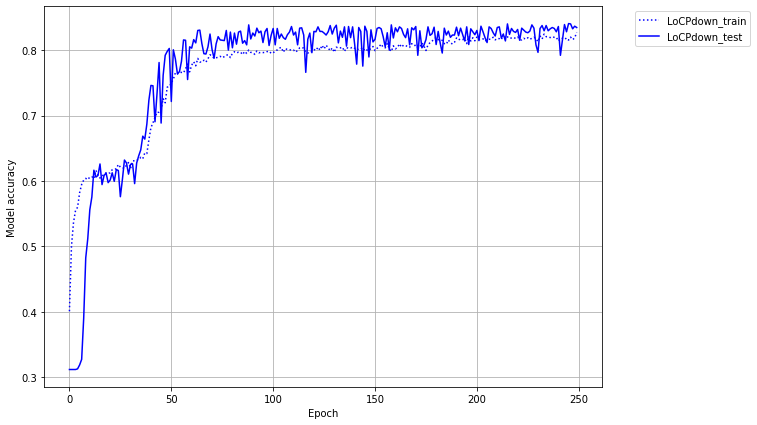

In [235]:
plt.figure(figsize=(10,7))

plt.plot(fit1.history['accuracy'], label='LoCPdown_train', c='b', ls='dotted')
plt.plot(fit1.history['val_accuracy'], label='LoCPdown_test', c='b')

plt.legend(bbox_to_anchor=(1.05, 1))

plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.grid()

plt.show()

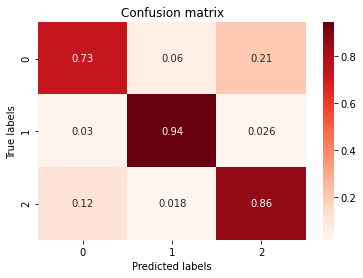

In [236]:
y_pred_val  = model1.predict(x_val_fft)

#take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, fmt = '.2g')

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion matrix')
plt.show()

In [238]:
LoCP_model = tensorflow.keras.models.load_model('MODEL/LoCP_parameters.h5')

y_prob = LoCP_model.predict(x_val) 
y_classes = y_prob.argmax(axis=-1)
 
with open('LoCPdown_yhat.h5', mode='w') as writing_file:
    writer = csv.writer(writing_file, delimiter='\n')
    writer.writerow(y_classes)

In [239]:
fname ='MODEL/LoCPdown_parameters.h5'
model1.save(fname, save_format='h5')